In [1]:
# import numpy
import numpy as np

# load up arm parameters arm_params and some helper functions
from twojointarm_funs import *

# for plotting
import matplotlib.pyplot as plt

In [2]:
# Setup initial conditions of simulation

A1    = np.array([55,90]) * np.pi/180  # arm start position: (55,90) degrees (shoulder,elbow)
H1,E1 = joints_to_hand(A1, arm_params) # convert to cartesian (x,y) hand position H1
H2    = H1 + np.array([0, 0.15])       # 15 cm movement distance straight ahead (in y only)
mt    = 0.500                          # movement time (sec)
sr    = 100                            # sample rate (Hz)
npts  = int(mt*sr)+1                   # number of time points

In [3]:
# Compute a minimum-jerk hand trajectory
# between H1 and H2 in mt seconds using npts sample points
t,H,Hd,Hdd = minjerk(H1,H2,mt,npts)

# compute the corresponding joint angles, velocities, and accelerations
A,Ad,Add = hand_to_joints((H,Hd,Hdd),arm_params)

# compute the joint torques from muscles required
# to drive the arm along the trajectory
Q = inverse_dynamics(A,Ad,Add,arm_params)

In [4]:
# Run a forward simulation using the computed joint torques Q

# initial joint angles and velocities
A0, Ad0 = A[0,:], Ad[0,:]

# run the simulation forward
A_sim, Ad_sim, Add_sim = forward_dynamics(A0, Ad0, Q, t, arm_params)


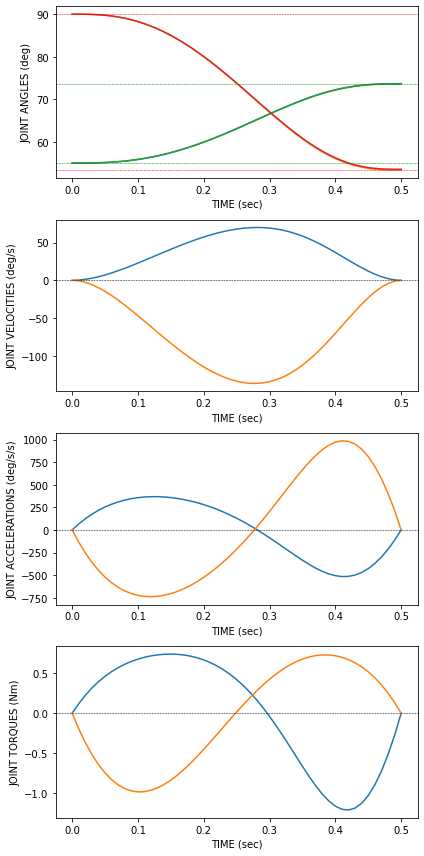

In [32]:
# Plot the simulated arm movement

f0 = plt.figure(figsize=(6,12), dpi=72)
ax = f0.add_subplot(4,1,1)
lines = ax.plot(t,A*180/np.pi)
lines2= ax.plot(t,A_sim*180/np.pi)
ax.axhline(y=A[0,0]*180/np.pi, color='g', linestyle='--', linewidth=0.5)
ax.axhline(y=A[-1,0]*180/np.pi, color='g', linestyle='--', linewidth=0.5)
ax.axhline(y=A[0,1]*180/np.pi, color='r', linestyle='--', linewidth=0.5)
ax.axhline(y=A[-1,1]*180/np.pi, color='r', linestyle='--', linewidth=0.5)
ax.set_xlabel('TIME (sec)')
ax.set_ylabel('JOINT ANGLES (deg)')
ax = f0.add_subplot(4,1,2)
lines = ax.plot(t,Ad*180/np.pi)
ax.axhline(y=0.0, color='k', linestyle='--', linewidth=0.5)
ax.set_xlabel('TIME (sec)')
ax.set_ylabel('JOINT VELOCITIES (deg/s)')
ax = f0.add_subplot(4,1,3)
lines = ax.plot(t,Add*180/np.pi)
ax.axhline(y=0.0, color='k', linestyle='--', linewidth=0.5)
ax.set_xlabel('TIME (sec)')
ax.set_ylabel('JOINT ACCELERATIONS (deg/s/s)')
ax = f0.add_subplot(4,1,4)
lines = ax.plot(t,Q)
ax.axhline(y=0.0, color='k', linestyle='--', linewidth=0.5)
ax.set_xlabel('TIME (sec)')
ax.set_ylabel('JOINT TORQUES (Nm)')
f0.tight_layout()
